200014B Group A-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

def square(t):
  if t % 1 < 0.25 or t % 1 > 0.75:
    s = 1
  elif t % 1 == 0.25 or t % 1 == 0.75:
    s = 0.5
  else:
    s = 0
  return s

# Fourier series coefficients
def a(k):
  if k == 0:
    a_k = 1/2
  else:
    a_k = np.sin(k*np.pi*t)/k*np.pi
  return a_k

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import integrate
from scipy import signal

def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s


def a(k):

    if k==0:
        return 1/2
    else :
        a_k = np.sin(k*np.pi/2)/(k*np.pi)

    return a_k


def fs_approx(t, N):
    global w
    w=2*np.pi
    x_t=0

    for n in range(-N,N):
        x_t+=a(n)*np.exp(1j*n*w*t)

    return x_t

time=np.arange(-2.5,2.5,5/1000)
x=[]
y=[]
N=5
for t in time:
    x.append(square(t))
    y.append(fs_approx(t,N))

fig,ax=plt.subplots(2,2,figsize=(10,8))
ax[0,0].plot(time, [square(t_) for t_ in time])
ax[0,1].plot(time, [fs_approx(t_,N) for t_ in time])

time=np.arange(-2.5,2.5,5/1000)
x=[]
y=[]
N=50
for t in time:
    x.append(square(t))
    y.append(fs_approx(t,N))


ax[1,0].plot(time, [square(t_) for t_ in time])
ax[1,1].plot(time, [fs_approx(t_,N) for t_ in time])

plt.show()

Q: Comment on your observations. ( i.e. for 𝑁 = 5 and 𝑁 = 50)

When increase the N number
of harmonics the wave become approxiately equal to square wave


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


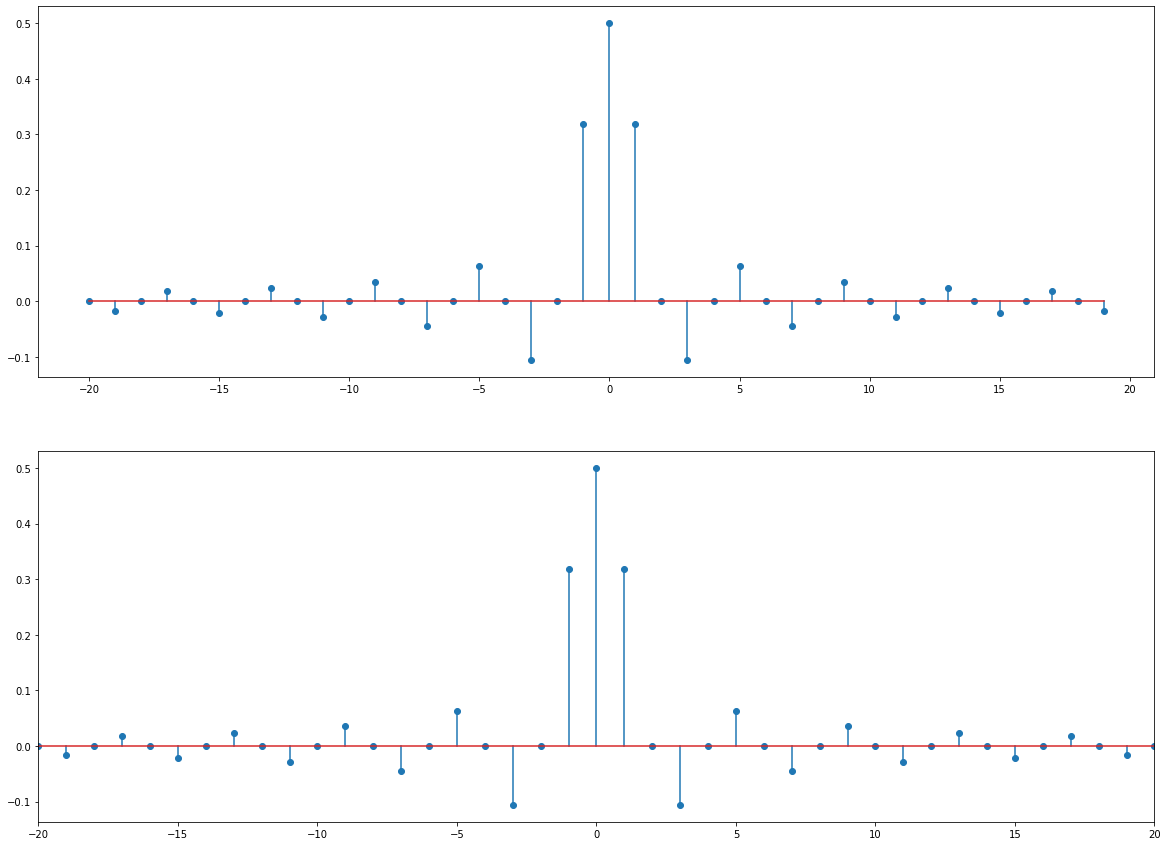

In [ ]:
N = 200
t = np.linspace(0, 1 -1/N, N)
x = []

for i in t:
  x.append(square(i))

X = fftshift(fft(x))
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)

K=np.arange(-20,20)
a_k=[]
K=np.arange(-20,20)
aK=[]
for i in K:
  a_k.append(a(i))

fig,ax=plt.subplots(2,1,figsize=(20,15))
ax[0].stem(K,[a_k[c] for c in range(len(K))])

ax[1].stem(k,X_norm)
ax[1].set_xlim(-20,20)
plt.show()

Q: Comment on the observations from the above codes. [Graded]

There is no change in the two plots we calculte the fourier series using built-in function and calculted function is same as like(No deviation in there)

In [ ]:
w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi
a1 = 0.75
a2 = 1
a3 =  0.5
fs = 4095
ws = 2*np.pi*fs
def x(t):
  x_t = a1*np.sin(w1*t) + a2*np.sin(w2*t) + a2*np.sin(w3*t)
  return x_t

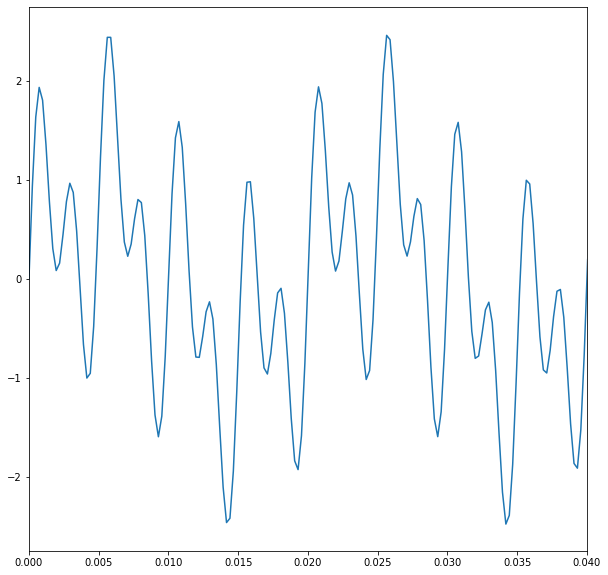

In [ ]:
time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(time, [xt[t_] for t_ in range(len(time))])

ax.set_xlim(0,0.04)
plt.show()

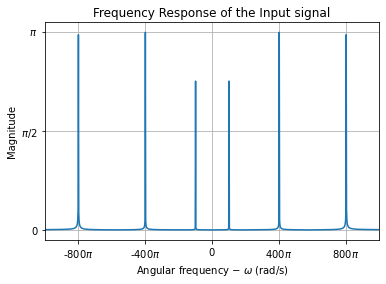

In [ ]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2

fig, ax = plt.subplots()
Xw_ = np.abs(Xw)
ax.plot(w, Xw_)

ax.set_title("Frequency Response of the Input signal")
ax.set_xlabel("Angular frequency −"+r" $\omega$ (rad/s)")
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

In [ ]:
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
  if wc1<w<wc2:
    gain = 1
  else:
    gain = 0
  return gain

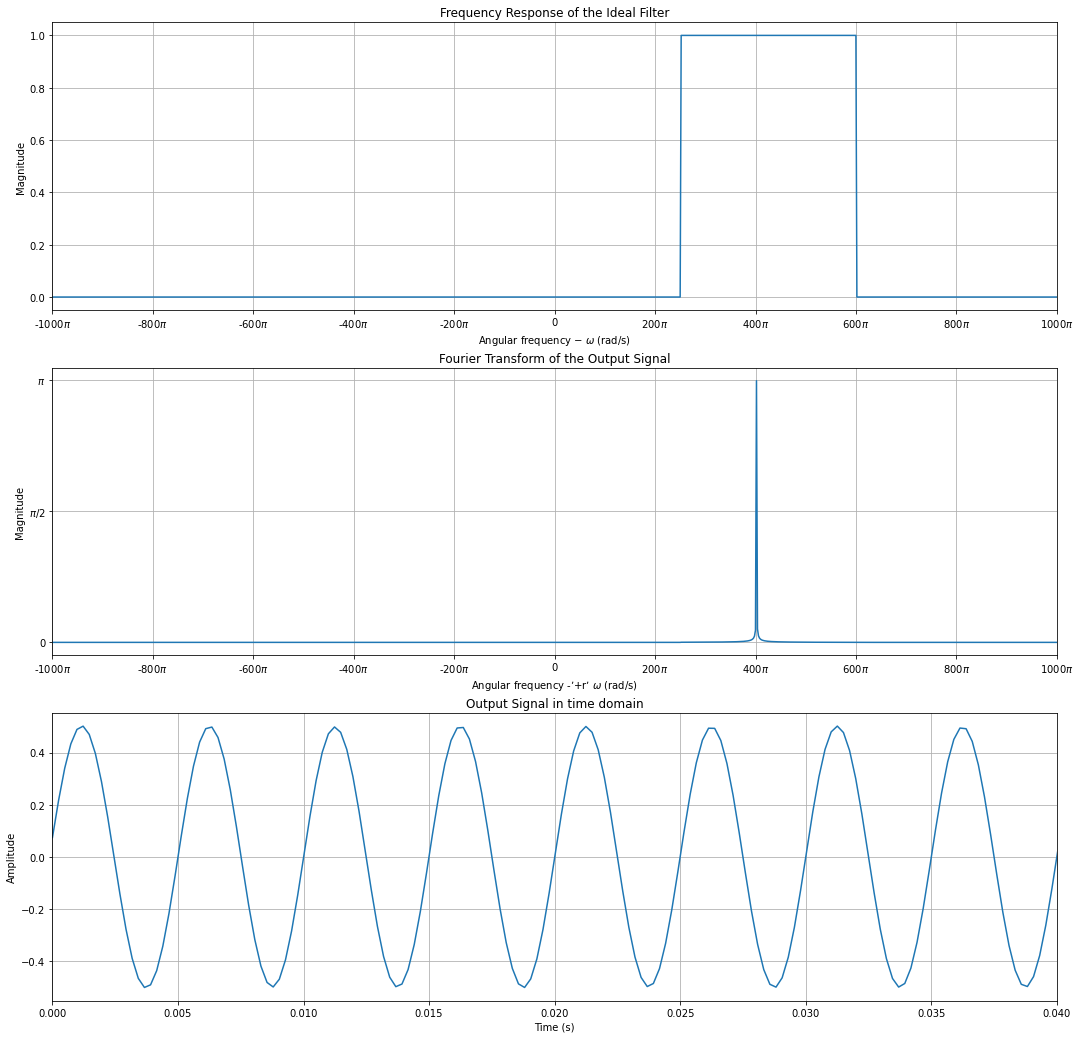

In [ ]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2

H0w = [ideal_filter(w_) for w_ in w]

Y0w = np.multiply(Xw,H0w)

y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))

fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -’+r’ $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

In [ ]:
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)

y = signal.lfilter(b,a,xt)

Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)

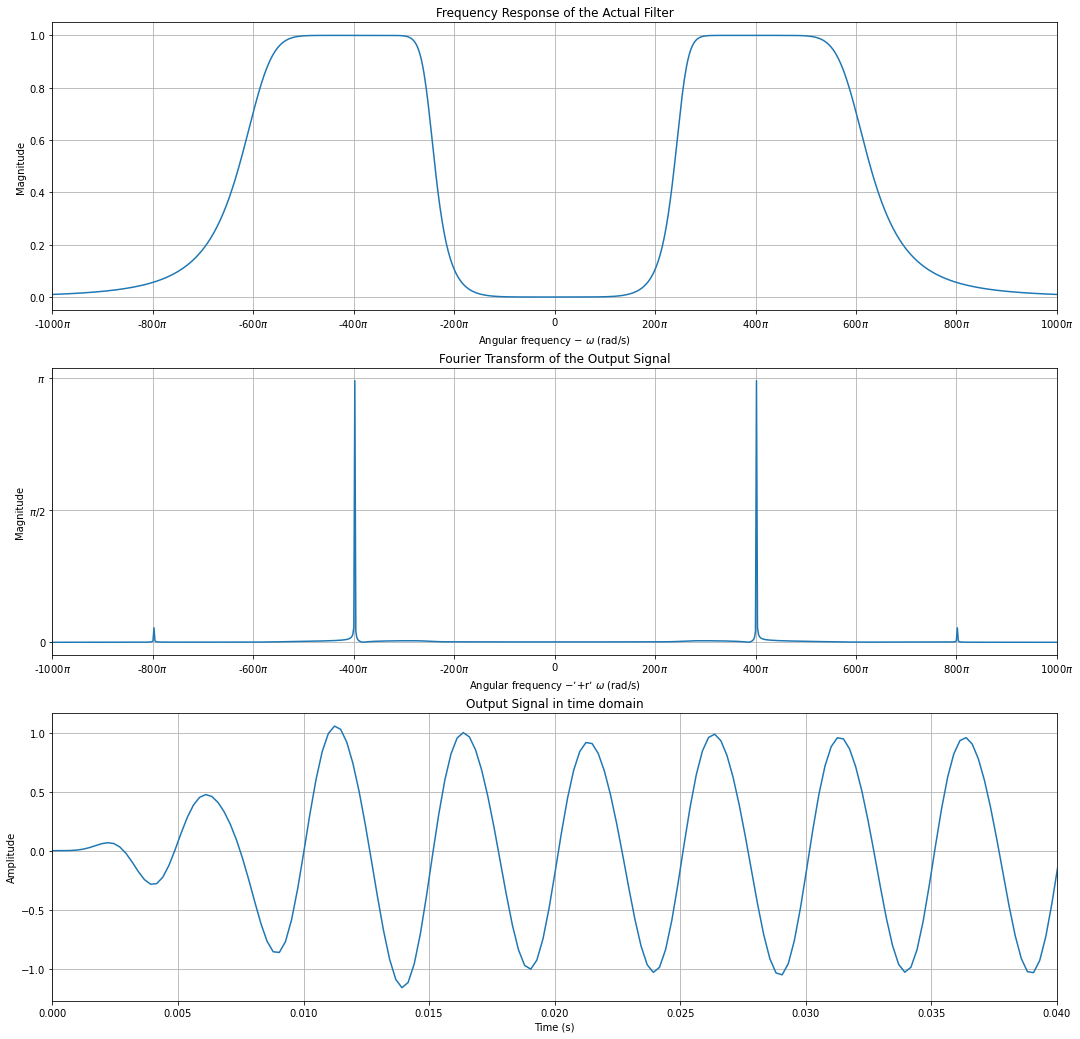

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −’+r’ $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

Q: Comment on your observations in Part - A and Part - B. [Graded]
The ideal filter doesn't take time to stabilize. And in practical situation filters take time to stabilize there the deviation formed on the graph

In [ ]:
fo = open("ecg_signal.csv", "r")

ecg = []

for i in fo:
  ecg.append(float(i))

duration = 10
T = duration/len(ecg)
Fs = 1/T

F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

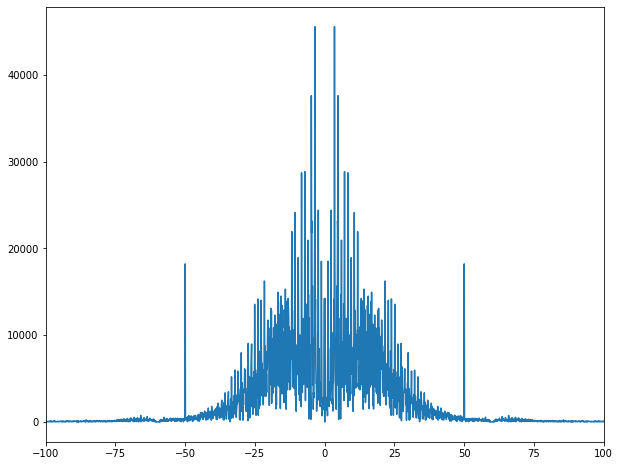

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))

x = np.abs(F)
ax.plot(fr, x)
ax.set_xlim(-100, 100)
plt.show()


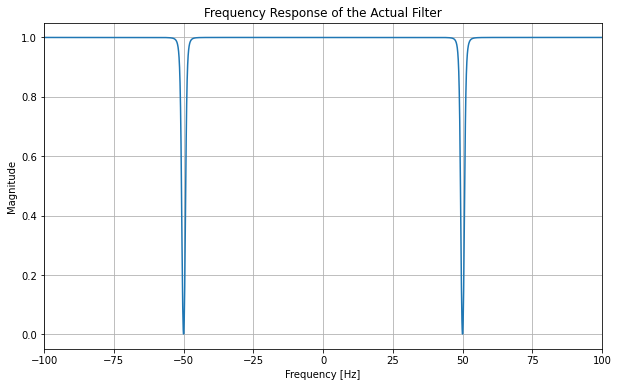

In [ ]:
f1 = 49
f2 = 51
filter_type = 'bandstop'
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)

ww, h = signal.freqz(b, a, 2047)

ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()


(0.0, 3.0)

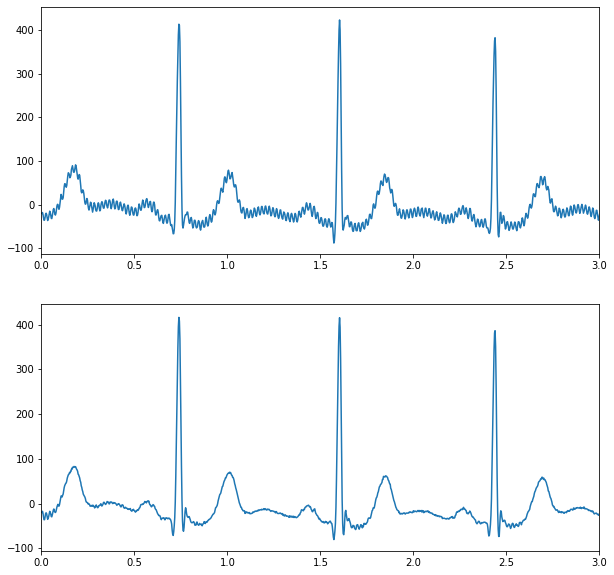

In [ ]:
time = np.arange(T, duration+T, T)

output = signal.lfilter(b, a, ecg)

fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(time, ecg)
ax[1].plot(time, output)

ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)


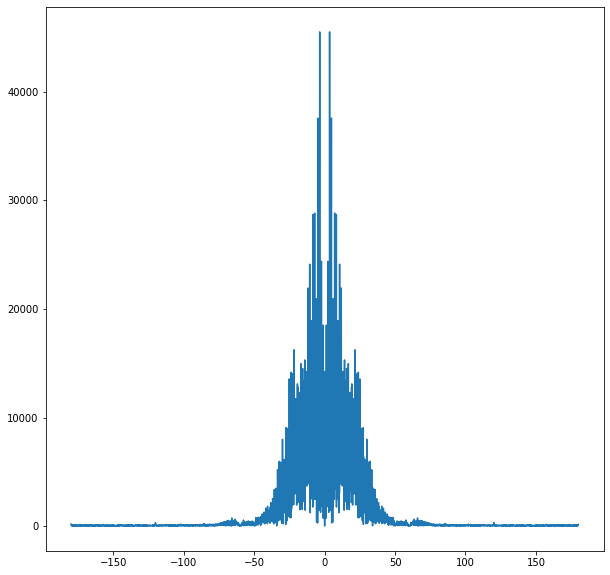

In [ ]:
f1 = fftshift(fft(output))
fig, ax = plt.subplots(figsize=(10,10))

f_1 = np.abs(f1)
ax.plot(fr, f_1)
plt.show()

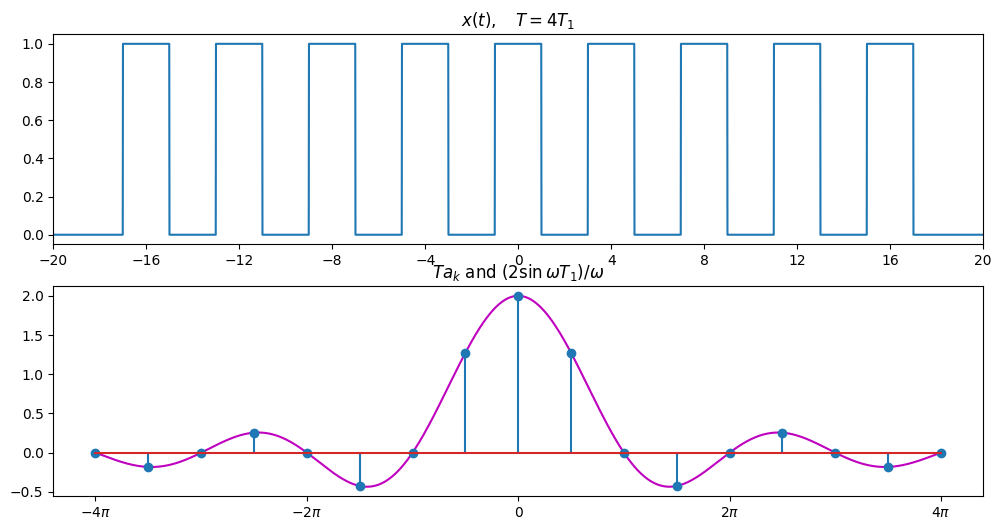

In [ ]:
# FS to FT
import numpy as np
import matplotlib.pyplot as plt

def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

def TX(omega, T1): #X(j omega)
    Xjomega = [2*np.sin(w*T1)/w if w != 0 else 2*T1 for w in omega] # Setting 2T1 for omega = 0 as well.
    return Xjomega

def x(t, T1, T): #x(t) squuare waveform
    nmin = int(t[0]//T) + 1
    nmax = int(t[-1]//T)
    xt = np.zeros(len(t))
    for n in range(nmin, nmax + 1, 1):
        xt[np.abs(t -  n*T) < T1] = 1
    return xt

omegalim = 4*np.pi
omega = np.arange(-omegalim,omegalim + np.pi/100, np.pi/100)
T1 = 1
t = np.arange(-20*T1, 20*T1, T1/100)

fig, ax = plt.subplots(2, figsize=(12,6))


for n in  range(4, 33, 1):
    T = n*T1

    ax[0].clear()
    ax[1].clear()
    ax[0].set_title('$x(t),\quad T= {0}T_1$'.format(n))
    ax[1].set_title('$Ta_k$ and $(2\sin\omega T_1)/\omega$')

    ax[0].xaxis.set_major_locator(plt.MultipleLocator(T))
    ax[0].set_xlim(-20,20)
    ax[0].plot(t, x(t, T1, T))

    ax[1].xaxis.set_major_locator(plt.MultipleLocator(2*np.pi))
    ax[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax[1].plot(omega, TX(omega, T1), color='m')

    omega0 = 2*np.pi/T
    klim = omegalim/omega0
    k = np.arange(-klim, klim + 1, 1)
    ax[1].stem(k*omega0, TX(k*omega0, T1))
    plt.pause(0.5)
    # plt.savefig('./im/fig{0:03d}.png'.format(n))


plt.show()
